# Global Budget Spending Analysis
----
<i> Project 1 Team 5 </i><br/> 
Brett Fuller, Diego Jones, Mav Sanchez

In [2]:
#Import necessary package dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from scipy.stats import linregress
from pandas import DataFrame


#Import API Key
from config import api_key

#Define directories
source_data_dir = "source_data"
staging_data_dir = "staging_data"
target_data_dir = "target_data"
target_images_dir = "target_images"

### Data extraction
----
#####            API Calls

In [3]:
# Define base URLs for API
base_url_fromwherever ="put main endpoint here"

In [4]:
# Get  data
list_whatever = []
save_to_whatever = []

for a in list_whatever:
    
    query_url = base_url_fromwherever + 'appid=' + api_key + '&param=' + a
    response = requests.get(query_url).json() 
    try:
        list_whatever.append(response) #customize depending on the JSON structure
    except:
        pass

# Save api data to data frames
staging_df = pd.DataFrame(list_whatever)

In [5]:
# Save df to csv so we don't have to perform API calls again
staging_df.to_csv(f"{staging_data_dir}/staging_df.csv")

In [6]:
#####            CSV Load

In [7]:
budget_breakdown = "source_data/budget_breakdown.csv"

budgetbreakdown_df = pd.read_csv(budget_breakdown)
clean_budgetbreakdown = budgetbreakdown_df[['Unnamed: 0', 'Expenditure on general public services',
       'Expenditure on defense', 'Expenditure on public order & safety',
       'Expenditure on economic affairs',
       'Expenditure on environment protection',
       'Expenditure on housing & community amenities', 'Expenditure on health',
       'Expenditure on recreation, culture, & religion',
       'Expenditure on education', 'Expenditure on social protection']]
clean_budgetbreakdown = clean_budgetbreakdown.dropna()

clean_budgetbreakdown = clean_budgetbreakdown.rename(columns = {'Unnamed: 0': 'Country'})


In [29]:
country_rank = "source_data/top_73.csv"
country_ranking = pd.read_csv(country_rank, header=None
                             )
country_ranking = country_ranking.rename(columns = {0: 'Country'})

combined_countrydf = clean_budgetbreakdown.merge(country_ranking, on='Country')
combined_countrydf.columns = ['Country',
               'Expenditure on general public services',
                               'Expenditure on defense',
                 'Expenditure on public order & safety',
                      'Expenditure on economic affairs',
                'Expenditure on environment protection',
         'Expenditure on housing & community amenities',
                                'Expenditure on health',
       'Expenditure on recreation, culture, & religion',
                             'Expenditure on education',
                     'Expenditure on social protection',
                                                      'Overall Ranking',
                                                      'Entrepreneurship Ranking',
                                                      'Adventure Ranking',
                                                      'Citizenship Ranking',
                                                      'Cultural Influence Ranking',
                                                      'Heritage Ranking',
                                                      'Movers Ranking',
                                                      'Open For Business Ranking',
                                                      'Power Ranking',
                                                     'Quality of Life Ranking']

combined_countrydf

,Country,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,...,Overall Ranking,Entrepreneurship Ranking,Adventure Ranking,Citizenship Ranking,Cultural Influence Ranking,Heritage Ranking,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking
0,Austria,6.4,0.6,1.3,5.7,0.4,0.3,8.2,1.2,4.9,...,18,17,22,12,25,20,59,15,27,11
1,Estonia,4.0,2.4,1.9,4.2,0.6,0.3,5.2,2.0,5.7,...,55,40,60,26,61,62,73,26,72,45
2,Finland,8.0,1.3,1.2,4.5,0.2,0.3,7.2,1.4,6.1,...,14,16,27,6,26,43,32,9,35,9
3,France,6.2,1.8,1.6,5.5,0.9,1.1,8.1,1.4,5.5,...,12,15,12,13,2,4,44,29,6,16
4,Germany,5.7,0.9,1.6,3.3,0.6,0.4,7.2,1.0,4.1,...,4,1,50,10,15,19,41,17,4,10
5,Greece,8.8,2.1,2.1,4.1,1.4,0.2,5.0,0.7,4.0,...,27,32,4,23,13,3,20,46,43,26
6,Italy,7.9,1.3,1.9,3.9,0.9,0.6,6.9,0.8,3.8,...,17,20,2,18,1,1,21,36,17,21
7,Latvia,4.4,1.6,2.2,4.7,0.5,0.9,3.8,1.4,5.5,...,62,48,59,33,68,68,69,42,71,49
8,Lithuania,4.0,1.6,1.5,3.0,0.5,0.4,5.8,1.0,5.1,...,59,47,61,35,70,64,71,33,70,47
9,Luxembourg,5.0,0.4,1.0,5.7,0.8,0.5,4.8,1.2,4.6,...,21,19,45,14,27,55,56,1,30,13


In [9]:
population_breakdown = "source_data/Countries.csv"

populationbreakdown_df = pd.read_csv(population_breakdown)
populationbreakdown_df.columns


doublecombined_countrydf = combined_countrydf.merge(populationbreakdown_df, on='Country')
doublecombined_countrydf.head()

,Country,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,...,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,Austria,6.4,0.6,1.3,5.7,0.4,0.3,8.2,1.2,4.9,...,59,15,27,11,43439,0.980,3.4,0.014,8611000,5.2
1,Estonia,4.0,2.4,1.9,4.2,0.6,0.3,5.2,2.0,5.7,...,73,26,72,45,17295,0.998,3.8,0.034,1312000,-3.2
2,Finland,8.0,1.3,1.2,4.5,0.2,0.3,7.2,1.4,6.1,...,32,9,35,9,41921,1.000,2.5,0.028,5482000,3.0
3,France,6.2,1.8,1.6,5.5,0.9,1.1,8.1,1.4,5.5,...,44,29,6,16,36248,0.990,3.3,0.017,66810000,1.1
4,Germany,5.7,0.9,1.6,3.3,0.6,0.4,7.2,1.0,4.1,...,41,17,4,10,41219,0.990,3.4,0.007,81410000,1.5


In [10]:
# Load raw CSV files to data frame
safety_rank_data = pd.read_csv(f"{source_data_dir}/safety.csv")
safety_rank_data.head()

,Rank,Country,Amount spent on Public Safety (in Billions)
0,1,Netherlands,193.40
1,2,Norway,89.84
2,3,Australia,NaN
3,4,Sweden,NaN
4,5,Canada,NaN


In [11]:
health_rank_data = pd.read_csv(f"{source_data_dir}/health.csv")
health_rank_data.head()

,Country,Indicator Name,2016,2017
0,"Hong Kong SAR, China","Life expectancy at birth, total (years)",84.226829,84.680488
1,Japan,"Life expectancy at birth, total (years)",83.984878,84.099756
2,"Macao SAR, China","Life expectancy at birth, total (years)",83.854000,83.989000
3,Switzerland,"Life expectancy at birth, total (years)",83.602439,83.602439
4,Spain,"Life expectancy at birth, total (years)",83.329268,83.329268


### Data cleansing
----

In [12]:
# Options
# Delete nulls
# FillNA with zero, etc
# Reformat data (date format, name format)
# Save only the columns you need
from pandas import DataFrame


In [13]:
safety2016 = pd.merge(safety_rank_data, doublecombined_countrydf, on="Country")
safety2016.head()

,Rank,Country,Amount spent on Public Safety (in Billions),Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,...,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,1,Netherlands,193.40,4.5,1.1,1.9,3.9,1.4,0.3,7.5,...,39,6,21,6,44433,0.99,3.6,0.018,16940000,1.9
1,2,Norway,89.84,4.7,1.6,1.2,5.4,0.9,0.9,8.8,...,23,10,23,4,74735,1.00,2.5,0.017,5196000,6.6
2,3,Australia,NaN,4.2,1.9,1.7,4.0,0.8,0.5,6.9,...,16,14,15,5,56328,0.99,3.2,0.025,23780000,5.6
3,4,Sweden,NaN,6.7,1.2,1.3,4.2,0.4,0.5,6.9,...,47,7,20,3,50273,0.99,2.6,0.014,9799000,5.4
4,6,Luxembourg,NaN,5.0,0.4,1.0,5.7,0.8,0.5,4.8,...,56,1,30,13,101450,1.00,3.4,0.003,569676,16.3


In [14]:
reducedsafety_df = safety2016.loc[:, ["Country", "Rank", "Expenditure on public order & safety"]]
reducedsafety_df

,Country,Rank,Expenditure on public order & safety
0,Netherlands,1,1.9
1,Norway,2,1.2
2,Australia,3,1.7
3,Sweden,4,1.3
4,Luxembourg,6,1.0
5,New Zealand,7,1.9
6,Switzerland,8,1.6
7,Denmark,9,1.0
8,Singapore,12,1.0
9,Israel,13,1.6


In [15]:
reducedsafety_df.count()

Country                                 27
Rank                                    27
Expenditure on public order & safety    27
dtype: int64

In [16]:
health2016 = pd.merge(health_rank_data, doublecombined_countrydf, on="Country")
health2016.head()

,Country,Indicator Name,2016,2017,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,...,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,Japan,"Life expectancy at birth, total (years)",83.984878,84.099756,3.9,0.9,1.2,3.5,1.2,0.7,...,5,25,7,14,32477,0.990,2.0,0.012,127000000,0.0
1,Switzerland,"Life expectancy at birth, total (years)",83.602439,83.602439,4.7,0.8,1.6,4.0,0.6,0.2,...,19,2,13,7,80215,0.990,3.6,0.008,8287000,4.7
2,Spain,"Life expectancy at birth, total (years)",83.329268,83.329268,5.8,1.0,1.9,3.7,0.8,0.4,...,38,28,19,18,25832,0.981,3.3,0.025,46560000,8.0
3,Italy,"Life expectancy at birth, total (years)",83.243902,83.243902,7.9,1.3,1.9,3.9,0.9,0.6,...,21,36,17,21,29847,0.992,3.3,0.022,60800000,3.9
4,Singapore,"Life expectancy at birth, total (years)",82.846341,82.895122,1.0,3.3,1.0,2.7,0.2,1.0,...,7,5,22,20,52889,0.968,2.4,0.000,5535000,13.6


In [17]:
health2016["2016"] = health2016["2016"].map("{:.2f}".format)
health2016.head()

,Country,Indicator Name,2016,2017,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,...,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,Japan,"Life expectancy at birth, total (years)",83.98,84.099756,3.9,0.9,1.2,3.5,1.2,0.7,...,5,25,7,14,32477,0.990,2.0,0.012,127000000,0.0
1,Switzerland,"Life expectancy at birth, total (years)",83.60,83.602439,4.7,0.8,1.6,4.0,0.6,0.2,...,19,2,13,7,80215,0.990,3.6,0.008,8287000,4.7
2,Spain,"Life expectancy at birth, total (years)",83.33,83.329268,5.8,1.0,1.9,3.7,0.8,0.4,...,38,28,19,18,25832,0.981,3.3,0.025,46560000,8.0
3,Italy,"Life expectancy at birth, total (years)",83.24,83.243902,7.9,1.3,1.9,3.9,0.9,0.6,...,21,36,17,21,29847,0.992,3.3,0.022,60800000,3.9
4,Singapore,"Life expectancy at birth, total (years)",82.85,82.895122,1.0,3.3,1.0,2.7,0.2,1.0,...,7,5,22,20,52889,0.968,2.4,0.000,5535000,13.6


In [18]:
reducedhealth_df = health2016.loc[:, ["Country", "2016", "Expenditure on health"]]
reducedhealth_df.head()

,Country,2016,Expenditure on health
0,Japan,83.98,7.6
1,Switzerland,83.60,2.2
2,Spain,83.33,5.9
3,Italy,83.24,6.9
4,Singapore,82.85,2.2


In [19]:
reducedhealth_df.count()

Country                  38
2016                     38
Expenditure on health    38
dtype: int64

### Data analysis
----

### Safety Data

In [20]:
# Perform statistical analysis
# Put applicable plot depending on your question
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as st


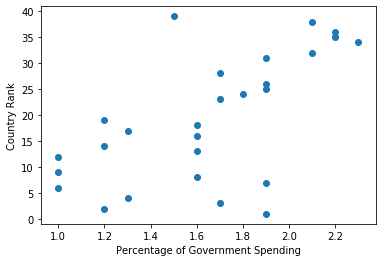

In [21]:
x_values = reducedsafety_df['Expenditure on public order & safety']
y_values = reducedsafety_df['Rank']
plt.scatter(x_values,y_values)
plt.xlabel('Percentage of Government Spending')
plt.ylabel('Country Rank')
plt.show()

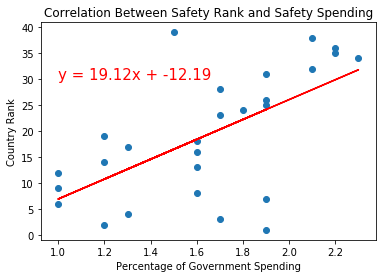

In [30]:
x_values = reducedsafety_df['Expenditure on public order & safety']
y_values = reducedsafety_df['Rank']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (1, 30), fontsize=15,color="red")
plt.xlabel('Percentage of Government Spending')
plt.ylabel('Country Rank')
plt.title('Correlation Between Safety Rank and Safety Spending')
plt.savefig("Safety.png")
plt.show()

In [23]:
rvalue

0.6146164023499968

In [24]:
line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
line_eq

'y = 19.12x + -12.19'

The plot above shows a negative correlation between the percentage of a countrie's expenditure on public safety and it's global safety ranking. The opposite is actually displayed - the lower a country was ranked on the UL Public Safety Index, the higher the percentage of it's safety spending. The r-value of .61 means this is a moderatley strong correlation. 

## Health Data

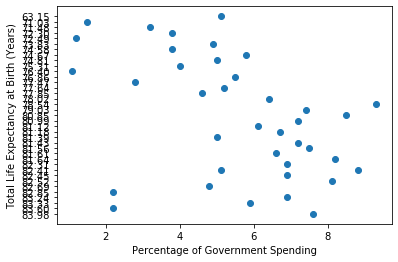

In [25]:
x_values = reducedhealth_df['Expenditure on health']
y_values = reducedhealth_df['2016']
plt.scatter(x_values,y_values)
plt.xlabel('Percentage of Government Spending')
plt.ylabel('Total Life Expectancy at Birth (Years)')
plt.show()

In [26]:
x_values.astype(float)

0     7.6
1     2.2
2     5.9
3     6.9
4     2.2
5     4.8
6     8.1
7     6.9
8     5.1
9     8.8
10    6.9
11    8.2
12    6.6
13    7.5
14    7.2
15    5.0
16    6.7
17    6.1
18    7.2
19    8.5
20    7.4
21    9.3
22    6.4
23    4.6
24    5.2
25    2.8
26    5.5
27    1.1
28    4.0
29    5.0
30    5.8
31    3.8
32    4.9
33    1.2
34    3.8
35    3.2
36    1.5
37    5.1
Name: Expenditure on health, dtype: float64

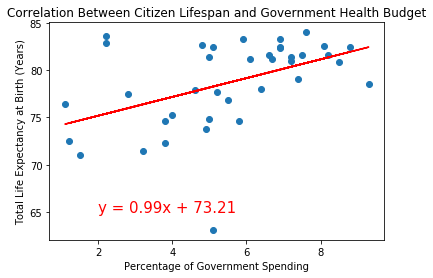

In [31]:
x_values = reducedhealth_df['Expenditure on health']
y_values = reducedhealth_df['2016'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2, 65), fontsize=15,color="red")
plt.xlabel('Percentage of Government Spending')
plt.ylabel('Total Life Expectancy at Birth (Years)')
plt.title('Correlation Between Citizen Lifespan and Government Health Budget')
plt.savefig("Health.png")
plt.show()

In [28]:
yearslived = np.longdouble(reducedhealth_df.iloc[:,1])
moneyspent = np.longdouble(reducedhealth_df.iloc[:,2])
correlation = st.pearsonr(yearslived,moneyspent)
print(f"The correlation between both factors is {round(correlation[0], 2)}")

The correlation between both factors is 0.47


The plot above shows a positive correlation between the percentage of a countries' expenditure on healthcare and the total life expectancy of its citizens. However, the r-value is only 0.47, showing that the correlation is on the weaker side. From the data we can determine that citizens in countries with higher GDP expenses allocated to healthcare tend to live longer. 